###Download API Credentials

###Then, upload the “kaggle.json” file that you just downloaded from Kaggle.

In [1]:
! pip install kaggle

In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download -d alxmamaev/flowers-recognition

100% 225M/225M [00:11<00:00, 13.5MB/s]



In [6]:
! unzip flowers-recognition.zip

Archive:  flowers-recognition.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423eb8bf71_n.jpg  
  i

In [7]:
!pip install -q split-folders

In [8]:
import os
import zipfile
import splitfolders 
import time
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import tensorflow as tf
import keras
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [9]:
pwd

'/content'

In [10]:
!ls "/content/flowers"

daisy  dandelion  rose	sunflower  tulip


In [11]:
# Split the Dataset folders into train test val folders

splitfolders.ratio(input="/content/flowers",output="output", seed=100, ratio=(.8, .1, .1), group_prefix=None)

Copying files: 4317 files [00:01, 3290.65 files/s]


In [12]:
#create paths for folders 

daisy_dir = os.path.join("/content/output/train/daisy")
dandelion_dir = os.path.join("/content/output/train/dandelion")
rose_dir = os.path.join("/content/output/train/rose")
sunflower_dir = os.path.join("/content/output/train/sunflower")
tulip_dir = os.path.join("/content/output/train/tulip")

In [13]:
#count number of files in each directory
print('Total training Daisy images :',len(os.listdir(daisy_dir)))
print('Total training Dandelion images :',len(os.listdir(dandelion_dir)))
print('Total training Rose images :',len(os.listdir(rose_dir)))
print('Total training Sunflower images :',len(os.listdir(sunflower_dir)))
print('Total training Tulip images :',len(os.listdir(tulip_dir)))

Total training Daisy images : 611
Total training Dandelion images : 841
Total training Rose images : 627
Total training Sunflower images : 586
Total training Tulip images : 787


In [14]:
daisy_files = os.listdir(daisy_dir)
dandelion_files = os.listdir(dandelion_dir)
rose_files = os.listdir(rose_dir)
sunflower_files = os.listdir(sunflower_dir)
tulip_files = os.listdir(tulip_dir)

print("Total len of training images",len(daisy_files+dandelion_files+rose_files+sunflower_files+tulip_files))

Total len of training images 3452


In [15]:
#count of images available in test dataset for each category
print('Total Test Daisy images :',len(os.listdir('output/test/daisy')))
print('Total Test Dandelion images :',len(os.listdir('output/test/dandelion')))
print('Total Test Rose images :',len(os.listdir('output/test/rose')))
print('Total Test Sunflower images :',len(os.listdir('output/test/sunflower')))
print('Total Test Tulip images :',len(os.listdir('output/test/tulip')))

Total Test Daisy images : 77
Total Test Dandelion images : 106
Total Test Rose images : 79
Total Test Sunflower images : 74
Total Test Tulip images : 99


## Visualization

In [16]:
#to plot images get complete paths for images
pic_index = 10

#get paths for some of the immages from each folder
daisy_fewimg = [os.path.join(daisy_dir,fname) for fname in daisy_files[pic_index-10:pic_index]]
dandelion_fewimg = [os.path.join(dandelion_dir,fname) for fname in dandelion_files[pic_index-10:pic_index]]
rose_fewimg = [os.path.join(rose_dir,fname) for fname in rose_files[pic_index-10:pic_index]]
sunflower_fewimg = [os.path.join(sunflower_dir,fname) for fname in sunflower_files[pic_index-10:pic_index]]
tulip_fewimg = [os.path.join(tulip_dir,fname) for fname in tulip_files[pic_index-10:pic_index]]


(333, 500, 3)


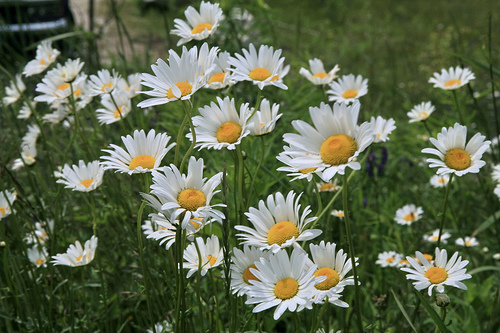

In [17]:
#plot random image 
import PIL.Image as Image

print(cv2.imread(daisy_fewimg[0]).shape)
Image.open(daisy_fewimg[0])

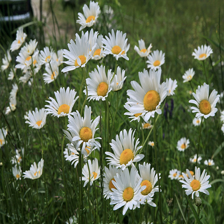

In [18]:
Image.open(daisy_fewimg[0]).resize((224,224))

In [19]:
#function to convert BGR image to RGB
def cvtRGB(img):
    return cv2.cvtColor(img.copy(), cv2.COLOR_BGR2RGB)

In [20]:
#plot smaple of images function
def plot_img(imgpath_list):

  fig, ax = plt.subplots(3,3,figsize=(10,10))
  k = 0
  for j in range(3):
    for i in range(3):
        img = cv2.resize(cv2.imread(imgpath_list[k]),(224,224))
        k=k+1
        ax[i,j].imshow(cvtRGB(img));
        ax[i,j].axis('off');

				Daisy


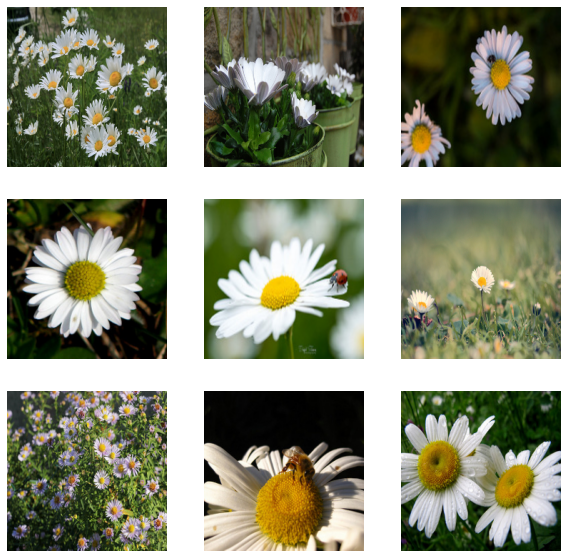

In [21]:
print('\t\t\t\tDaisy')
plot_img(daisy_fewimg)

				Dadelion


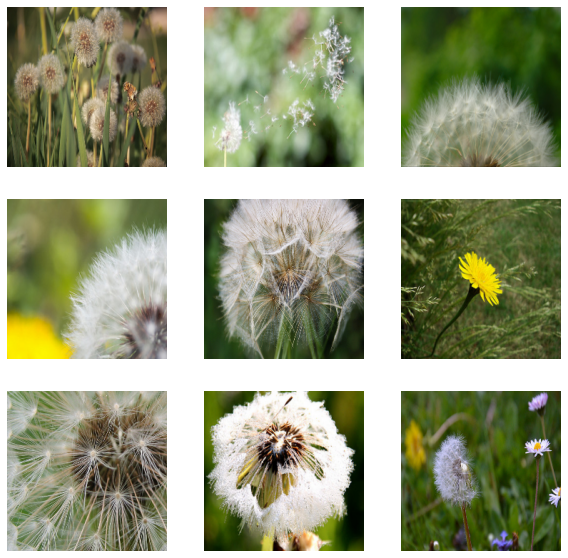

In [22]:
print('\t\t\t\tDadelion')
plot_img(dandelion_fewimg)

				Rose


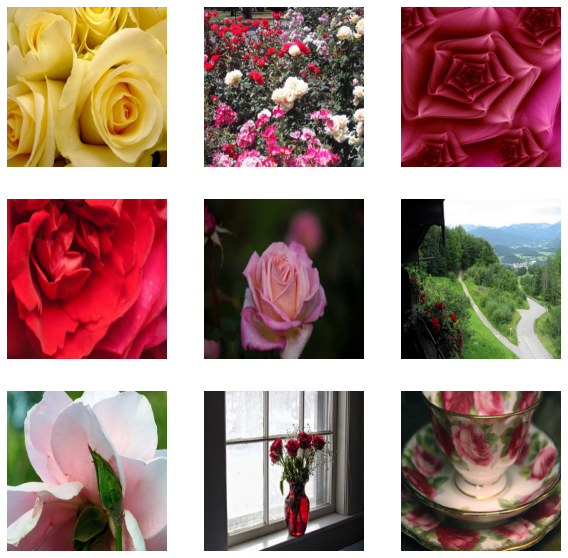

In [23]:
print('\t\t\t\tRose')
plot_img(rose_fewimg)

				Tulip


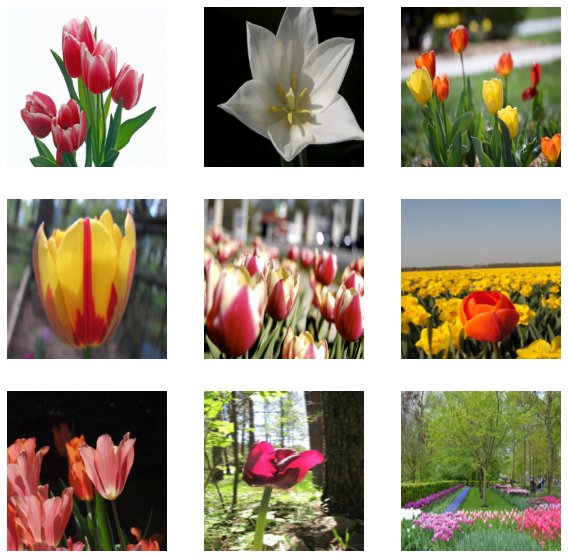

In [24]:
print('\t\t\t\tTulip')
plot_img(tulip_fewimg)

				Sunflower


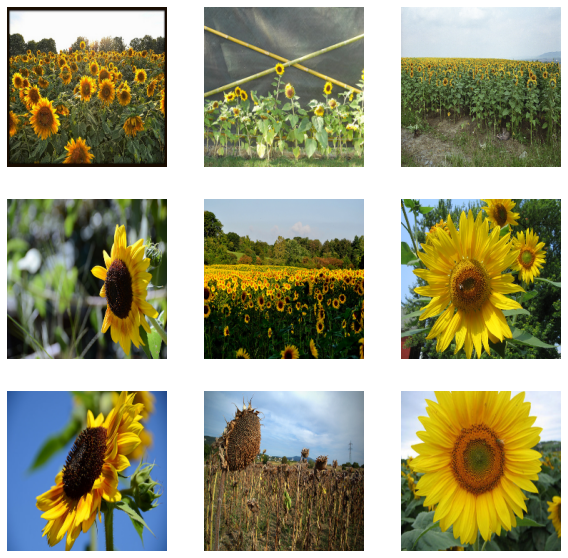

In [25]:
print('\t\t\t\tSunflower')
plot_img(sunflower_fewimg)

## Image Pre-Processing

In [26]:
#image Augumentation using ImageDataGenerator on train data 
#Data augmentation is used to increase the size of training set and to get more different images

training_dir = "/content/output/train"
training_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [27]:
#do not perform augmentation on validation and test data/validation set ,this might mislead the results

validation_dir = "/content/output/val"
validation_datagen = ImageDataGenerator(rescale=1./255)

In [28]:
test_dir = "/content/output/test"
test_datagen = ImageDataGenerator(rescale=1./255)

In [29]:
#flow_from_directory() method allows you to read the images directly from the directory and augment them while the neural network model is learning on the training data.

training_set = training_datagen.flow_from_directory(training_dir,target_size=(128,128),batch_size=32,class_mode='categorical')
validation_set = validation_datagen.flow_from_directory(validation_dir,target_size=(128,128),batch_size=32,class_mode='categorical')
test_set = test_datagen.flow_from_directory(test_dir,target_size=(128,128),batch_size=32,class_mode='categorical')

Found 3452 images belonging to 5 classes.
Found 430 images belonging to 5 classes.
Found 435 images belonging to 5 classes.


### Model Building

In [30]:
def create_model():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (128,128,3)))
  model.add(tf.keras.layers.MaxPool2D(2,2))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))
  model.add(tf.keras.layers.MaxPool2D(2,2))
  model.add(tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'))
  model.add(tf.keras.layers.MaxPool2D(2,2))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'))
  model.add(tf.keras.layers.MaxPool2D(2,2))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.Dense(512, activation = 'relu'))
  model.add(tf.keras.layers.Dense(5, activation = 'softmax'))

  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics = ['accuracy'])
  return model


In [31]:
create_model().summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0

In [32]:
#3452/32

107.875

In [34]:
epochs = 30

flower_model = create_model()

history = flower_model.fit(training_set,epochs=epochs,validation_data=validation_set,verbose=2)

Epoch 1/30
108/108 - 23s - loss: 1.4303 - accuracy: 0.3624 - val_loss: 1.3070 - val_accuracy: 0.4814
Epoch 2/30
108/108 - 21s - loss: 1.1747 - accuracy: 0.5003 - val_loss: 1.1672 - val_accuracy: 0.4907
Epoch 3/30
108/108 - 21s - loss: 1.0990 - accuracy: 0.5492 - val_loss: 1.0787 - val_accuracy: 0.5535
Epoch 4/30
108/108 - 21s - loss: 1.0143 - accuracy: 0.5829 - val_loss: 0.9972 - val_accuracy: 0.5744
Epoch 5/30
108/108 - 22s - loss: 0.9440 - accuracy: 0.6306 - val_loss: 0.9664 - val_accuracy: 0.6326
Epoch 6/30
108/108 - 21s - loss: 0.8922 - accuracy: 0.6596 - val_loss: 0.8761 - val_accuracy: 0.6349
Epoch 7/30
108/108 - 22s - loss: 0.8763 - accuracy: 0.6608 - val_loss: 0.8975 - val_accuracy: 0.6465
Epoch 8/30
108/108 - 22s - loss: 0.8299 - accuracy: 0.6863 - val_loss: 0.8483 - val_accuracy: 0.6581
Epoch 9/30
108/108 - 22s - loss: 0.7997 - accuracy: 0.6993 - val_loss: 0.8555 - val_accuracy: 0.6744
Epoch 10/30
108/108 - 22s - loss: 0.7639 - accuracy: 0.7100 - val_loss: 0.8738 - val_accura

In [36]:
import pandas as pd
pd.DataFrame(history.history)

loss  accuracy  val_loss  val_accuracy
0   1.430338  0.362399  1.307025      0.481395
1   1.174746  0.500290  1.167161      0.490698
2   1.098956  0.549247  1.078679      0.553488
3   1.014253  0.582851  0.997183      0.574419
4   0.944019  0.630649  0.966401      0.632558
5   0.892213  0.659618  0.876062      0.634884
6   0.876322  0.660776  0.897512      0.646512
7   0.829888  0.686269  0.848330      0.658140
8   0.799673  0.699305  0.855483      0.674419
9   0.763947  0.710023  0.873815      0.658140
10  0.740448  0.712920  0.842096      0.651163
11  0.739176  0.721900  0.827495      0.676744
12  0.699826  0.745075  0.803905      0.686047
13  0.677889  0.740730  0.791059      0.679070
14  0.675176  0.752028  0.748496      0.709302
15  0.660871  0.746813  0.805873      0.681395
16  0.641122  0.753187  0.739860      0.718605
17  0.611936  0.764774  0.739347      0.706977
18  0.594449  0.761877  0.759122      0.730233
19  0.578764  0.782445  0.696974      0.737209
20  0.581355  0.776362  0.753219      0.695349
21  0.569663  0.779258  0.708570      0.716279
22  0.538150  0.792584  0.708285      0.734884
23  0.510598  0.804461  0.820900      0.693023
24  0.537407  0.792294  0.865878      0.660465
25  0.480847  0.813152  0.725358      0.730233
26  0.499513  0.807937  0.740525      0.700000
27  0.474578  0.825608  0.734012      0.753488
28  0.463701  0.825898  0.733227      0.720930
29  0.445787  0.830533  0.659069      0.748837

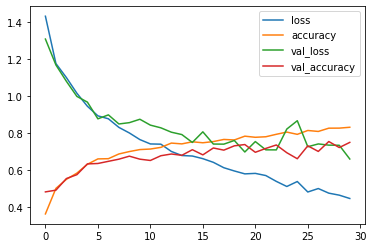

In [37]:
pd.DataFrame(history.history).plot()

In [38]:
flower_model.save("flower_model_classification.h5")
print("Saved to the directory. ")

Saved to the directory. 


In [40]:
model1 = keras.models.load_model("flower_model_classification.h5")

In [41]:
model1.evaluate(test_set)

  48667/Unknown - 4268s 87ms/step - loss: 0.7373 - accuracy: 0.7425

KeyboardInterrupt: ignored